In [1]:
from caveclient import CAVEclient
from intern import array
import pickle
import numpy as np
from agents import data_loader
from cloudvolume import CloudVolume
from membrane_detection import membranes
from agents.scripts import precompute_membrane_vectors, create_post_matrix, merge_paths, get_soma
import agents.sensor
from agents.run import run_agents
import aws.sqs as sqs
import sys
import time
import ast
import pandas as pd
import agents.scripts as scripts
from drive import drive

In [2]:
client = CAVEclient("minnie65_phase3_v1")

In [3]:
gt = pd.read_pickle("./ground_truth_dendrite_extension.pkl")
run_on = gt.iloc[-1]
root_id = scripts.get_public_seg_ids(run_on.seg_id)[0]
extensions = scripts.get_public_seg_ids(run_on.extensions)
coords = list(run_on.annotations)
coords = [[int(c) for c in co] for co in coords]

mem_seg, merges, pos_matrix, seg_ids, em, seg, compute_vectors = drive(1, radius=(100,100,10), resolution=(2,2,1), 
                                                                        unet_bound_mult=2, ep='None', save='pd', device='cpu',
                                                                        endp=coords[0], nucleus_id='none', root_id=root_id, time_point=0)



0


Decompressing: 100%|██████████| 32/32 [00:00<00:00, 693.66it/s]


Seg time: 3.805616855621338
Convolution time: 0.1316971778869629

Agent Spawning Prep Time 0.2562422752380371
Steps Time 2.5921919345855713


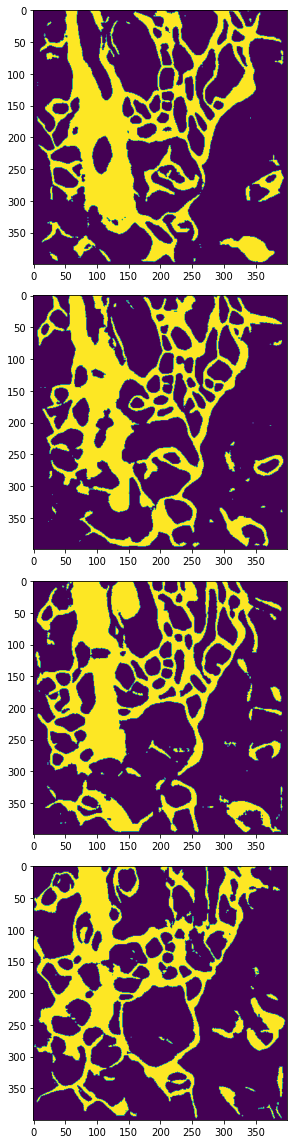

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4,1, figsize=(4,16))
ax[0].imshow(mem_seg[:,:,0])
ax[1].imshow(mem_seg[:,:,1])
ax[2].imshow(mem_seg[:,:,2])
ax[3].imshow(mem_seg[:,:,3])

plt.tight_layout()
plt.show()



In [17]:
merges

,EP,root_id,seg_id,Weight,Merge Locations
0,"[108958.0, 194091.0, 22035.0]",864691135491236447,864691133681785004,179.0,"[(95, 93, 8), (95, 94, 8), (95, 95, 9), (97, 9..."
1,"[108958.0, 194091.0, 22035.0]",864691135491236447,864691133681785772,158.0,"[(95, 94, 8), (95, 95, 10), (99, 107, 7), (99,..."
2,"[108958.0, 194091.0, 22035.0]",864691135491236447,864691134418610069,64.0,"[(106, 92, 1), (107, 92, 1), (108, 93, 1), (10..."
3,"[108958.0, 194091.0, 22035.0]",864691135491236447,864691133681786028,224.0,"[(113, 93, 8), (113, 93, 9), (113, 93, 10), (1..."
4,"[108958.0, 194091.0, 22035.0]",864691135491236447,864691133681786540,160.0,"[(116, 90, 4), (116, 91, 10), (116, 93, 3), (1..."
